✅ 数据加载成功，共 172 行 × 7 列
✅ 随机森林准确率：80.00%
📊 分类报告：
              precision    recall  f1-score   support

         非主胜       0.87      0.90      0.89        30
          主胜       0.25      0.20      0.22         5

    accuracy                           0.80        35
   macro avg       0.56      0.55      0.55        35
weighted avg       0.78      0.80      0.79        35



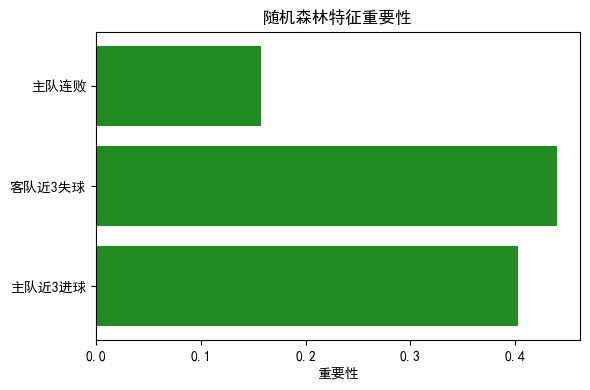

In [4]:
# 08_random_forest.ipynb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 加载特征数据
df = pd.read_csv(r'E:\miniconda\ChineseSuperLeague\data\features.csv')
print(f"✅ 数据加载成功，共 {df.shape[0]} 行 × {df.shape[1]} 列")

# 2. 特征与标签
X = df[['home_last3_goals', 'away_last3_concede', 'home_last2_loss']]
y = (df['result'] == 'H').astype(int)  # 主胜=1，其他=0

# 3. 拆分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# 4. 随机森林模型
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# 5. 预测与评估
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ 随机森林准确率：{acc:.2%}")
print("📊 分类报告：")
print(classification_report(y_test, y_pred, target_names=['非主胜', '主胜']))

# 6. 特征重要性图
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

importance = rf.feature_importances_
feat_names = ['主队近3进球', '客队近3失球', '主队连败']

plt.figure(figsize=(6, 4))
plt.barh(feat_names, importance, color='forestgreen')
plt.title('随机森林特征重要性')
plt.xlabel('重要性')
plt.tight_layout()
plt.show()